In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/rba-dataset/LICENSE
/kaggle/input/rba-dataset/README.md
/kaggle/input/rba-dataset/RESULTS.md
/kaggle/input/rba-dataset/rba-dataset.csv
/kaggle/input/rba-dataset/images/rq1-general.png
/kaggle/input/rba-dataset/images/rq1-login-frequency.png
/kaggle/input/rba-dataset/images/rtts-global.png
/kaggle/input/rba-dataset/images/login-overview.png
/kaggle/input/rba-dataset/images/rtts-continents.png
/kaggle/input/rba-dataset/images/rq6-rtt-0_999.png
/kaggle/input/rba-dataset/images/rq2-attack-data.png


In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import ipaddress
from sklearn.ensemble import AdaBoostClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [3]:
data = pd.read_csv('rba-dataset-2.csv', nrows=1000000)

In [4]:
# Specify the chunk size
chunk_size = 1000000  # Adjust based on your memory limits

# Initialize an empty list to store the data
chunks = []

# Read the CSV file in chunks
for chunk in pd.read_csv('rba-dataset-2.csv', chunksize=chunk_size):
    chunks.append(chunk)
    print("SSs")

# Concatenate all chunks into a single DataFrame
data = pd.concat(chunks, axis=0)

SSs
SSs
SSs
SSs
SSs
SSs
SSs
SSs
SSs
SSs
SSs
SSs
SSs
SSs
SSs
SSs
SSs
SSs
SSs
SSs
SSs
SSs
SSs
SSs
SSs
SSs
SSs
SSs
SSs
SSs
SSs
SSs


In [ ]:
data.rename(columns = {'Login Timestamp': 'LoginTimestamp', 'User ID': 'UserID', 'IP Address':'IPAddress', 'User Agent String': 'UserAgent', 'Browser Name and Version':'BrowserNameAndVersion', 'OS Name and Version':'OSNameAndVersion', 'Device Type':'DeviceType', 'Login Successful':'IsLoginSuccessful', 'Is Attack IP':'IsIPAttack', 'Is Account Takeover':'IsAccountTakeover', 'Login Hour':'LoginHour' }, inplace = True)  

In [ ]:
len(data)

In [5]:
data.head()

,index,Login Timestamp,User ID,Round-Trip Time [ms],IP Address,Country,Region,City,ASN,User Agent String,Browser Name and Version,OS Name and Version,Device Type,Login Successful,Is Attack IP,Is Account Takeover
0,0,2020-02-03 12:43:30.772,-4324475583306591935,NaN,10.0.65.171,NO,-,-,29695,Mozilla/5.0 (iPhone; CPU iPhone OS 13_4 like ...,Firefox 20.0.0.1618,iOS 13.4,mobile,False,False,False
1,1,2020-02-03 12:43:43.549,-4324475583306591935,NaN,194.87.207.6,AU,-,-,60117,Mozilla/5.0 (Linux; Android 4.1; Galaxy Nexus...,Chrome Mobile 46.0.2490,Android 4.1,mobile,False,False,False
2,2,2020-02-03 12:43:55.873,-3284137479262433373,NaN,81.167.144.58,NO,Vestland,Urangsvag,29695,Mozilla/5.0 (iPad; CPU OS 7_1 like Mac OS X) ...,Android 2.3.3.2672,iOS 7.1,mobile,True,False,False
3,3,2020-02-03 12:43:56.180,-4324475583306591935,NaN,170.39.78.152,US,-,-,393398,Mozilla/5.0 (Linux; Android 4.1; Galaxy Nexus...,Chrome Mobile WebView 85.0.4183,Android 4.1,mobile,False,False,False
4,4,2020-02-03 12:43:59.396,-4618854071942621186,NaN,10.0.0.47,US,Virginia,Ashburn,398986,Mozilla/5.0 (Linux; U; Android 2.2) Build/NMA...,Chrome Mobile WebView 85.0.4183,Android 2.2,mobile,False,True,False


In [7]:
data.dtypes

index                         int64
Login Timestamp              object
User ID                       int64
Round-Trip Time [ms]        float64
IP Address                   object
Country                      object
Region                       object
City                         object
ASN                           int64
User Agent String            object
Browser Name and Version     object
OS Name and Version          object
Device Type                  object
Login Successful               bool
Is Attack IP                   bool
Is Account Takeover            bool
dtype: object

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31269264 entries, 0 to 31269263
Data columns (total 16 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   index                     int64  
 1   Login Timestamp           object 
 2   User ID                   int64  
 3   Round-Trip Time [ms]      float64
 4   IP Address                object 
 5   Country                   object 
 6   Region                    object 
 7   City                      object 
 8   ASN                       int64  
 9   User Agent String         object 
 10  Browser Name and Version  object 
 11  OS Name and Version       object 
 12  Device Type               object 
 13  Login Successful          bool   
 14  Is Attack IP              bool   
 15  Is Account Takeover       bool   
dtypes: bool(3), float64(1), int64(3), object(9)
memory usage: 3.1+ GB


In [9]:
data.describe

<bound method NDFrame.describe of              index          Login Timestamp              User ID  \
0                0  2020-02-03 12:43:30.772 -4324475583306591935   
1                1  2020-02-03 12:43:43.549 -4324475583306591935   
2                2  2020-02-03 12:43:55.873 -3284137479262433373   
3                3  2020-02-03 12:43:56.180 -4324475583306591935   
4                4  2020-02-03 12:43:59.396 -4618854071942621186   
...            ...                      ...                  ...   
31269259  31269259  2021-02-28 23:59:47.766 -4324475583306591935   
31269260  31269260  2021-02-28 23:59:49.956 -4324475583306591935   
31269261  31269261  2021-02-28 23:59:54.233 -4324475583306591935   
31269262  31269262  2021-02-28 23:59:56.343 -4324475583306591935   
31269263  31269263  2021-02-28 23:59:58.756 -3863191272176615105   

          Round-Trip Time [ms]     IP Address Country          Region  \
0                          NaN    10.0.65.171      NO               -   
1  

In [10]:
data.isna().sum()

index                              0
Login Timestamp                    0
User ID                            0
Round-Trip Time [ms]        29993329
IP Address                         0
Country                            0
Region                         47409
City                            8590
ASN                                0
User Agent String                  0
Browser Name and Version           0
OS Name and Version                0
Device Type                     1526
Login Successful                   0
Is Attack IP                       0
Is Account Takeover                0
dtype: int64

In [11]:
data.head()

In [12]:
data['LoginHour'] = pd.to_datetime(data['LoginTimestamp']).dt.hour

,index,Login Timestamp,User ID,Round-Trip Time [ms],IP Address,Country,Region,City,ASN,User Agent String,Browser Name and Version,OS Name and Version,Device Type,Login Successful,Is Attack IP,Is Account Takeover,Login Hour
0,0,2020-02-03 12:43:30.772,-4324475583306591935,NaN,10.0.65.171,NO,-,-,29695,Mozilla/5.0 (iPhone; CPU iPhone OS 13_4 like ...,Firefox 20.0.0.1618,iOS 13.4,mobile,False,False,False,12
1,1,2020-02-03 12:43:43.549,-4324475583306591935,NaN,194.87.207.6,AU,-,-,60117,Mozilla/5.0 (Linux; Android 4.1; Galaxy Nexus...,Chrome Mobile 46.0.2490,Android 4.1,mobile,False,False,False,12
2,2,2020-02-03 12:43:55.873,-3284137479262433373,NaN,81.167.144.58,NO,Vestland,Urangsvag,29695,Mozilla/5.0 (iPad; CPU OS 7_1 like Mac OS X) ...,Android 2.3.3.2672,iOS 7.1,mobile,True,False,False,12
3,3,2020-02-03 12:43:56.180,-4324475583306591935,NaN,170.39.78.152,US,-,-,393398,Mozilla/5.0 (Linux; Android 4.1; Galaxy Nexus...,Chrome Mobile WebView 85.0.4183,Android 4.1,mobile,False,False,False,12
4,4,2020-02-03 12:43:59.396,-4618854071942621186,NaN,10.0.0.47,US,Virginia,Ashburn,398986,Mozilla/5.0 (Linux; U; Android 2.2) Build/NMA...,Chrome Mobile WebView 85.0.4183,Android 2.2,mobile,False,True,False,12


In [13]:
# Converting columns value to o/1
data['IsAccountTakeover'] = data['IsAccountTakeover'].astype(np.uint8)
data['IsIPAttack'] = data['IsIPAttack'].astype(np.uint8)
data['IsLoginSuccessful'] = data['IsLoginSuccessful'].astype(np.uint8)

# converting columns values to numbers using factorize
data['UserAgent'], _ = pd.factorize(data['UserAgent'])
data['BrowserNameAndVersion'], _ = pd.factorize(data['BrowserNameAndVersion'])
data['OSNameAndVersion'], _ = pd.factorize(data['OSNameAndVersion'])

# converting ip columns values to numbers can try with using factorize also
def ip_to_int(ip):
    return int(ipaddress.ip_address(ip))

data['IPAddress'] = data['IPAddress'].apply(ip_to_int)

In [14]:
data = data.drop(columns=["Round-Trip Time [ms]", 'Region', 'City', 'LoginTimestamp', 'index'])

In [15]:
data.head()

,User ID,IP Address,Country,ASN,User Agent String,Browser Name and Version,OS Name and Version,Device Type,Login Successful,Is Attack IP,Is Account Takeover,Login Hour
0,-4324475583306591935,10.0.65.171,NO,29695,Mozilla/5.0 (iPhone; CPU iPhone OS 13_4 like ...,Firefox 20.0.0.1618,iOS 13.4,mobile,0,0,0,12
1,-4324475583306591935,194.87.207.6,AU,60117,Mozilla/5.0 (Linux; Android 4.1; Galaxy Nexus...,Chrome Mobile 46.0.2490,Android 4.1,mobile,0,0,0,12
2,-3284137479262433373,81.167.144.58,NO,29695,Mozilla/5.0 (iPad; CPU OS 7_1 like Mac OS X) ...,Android 2.3.3.2672,iOS 7.1,mobile,1,0,0,12
3,-4324475583306591935,170.39.78.152,US,393398,Mozilla/5.0 (Linux; Android 4.1; Galaxy Nexus...,Chrome Mobile WebView 85.0.4183,Android 4.1,mobile,0,0,0,12
4,-4618854071942621186,10.0.0.47,US,398986,Mozilla/5.0 (Linux; U; Android 2.2) Build/NMA...,Chrome Mobile WebView 85.0.4183,Android 2.2,mobile,0,1,0,12


In [16]:
account_takeover_rows = data[data['IsAccountTakeover'] == 1]

# Display or further process the filtered rows
account_takeover_rows

In [18]:
data.head(10)

,User ID,IP Address,Country,ASN,User Agent String,Browser Name and Version,OS Name and Version,Device Type,Login Successful,Is Attack IP,Is Account Takeover,Login Hour
0,-4324475583306591935,167788971,NO,29695,0,0,0,mobile,0,0,0,12
1,-4324475583306591935,3260534534,AU,60117,1,1,1,mobile,0,0,0,12
2,-3284137479262433373,1369935930,NO,29695,2,2,2,mobile,1,0,0,12
3,-4324475583306591935,2854702744,US,393398,3,3,1,mobile,0,0,0,12
4,-4618854071942621186,167772207,US,398986,4,3,3,mobile,0,1,0,12
5,-4324475583306591935,3521936254,US,393398,5,3,1,mobile,0,1,0,12
6,7246533443898239661,1355474134,NO,15659,6,4,4,desktop,1,0,0,12
7,-3243978724802435038,2854702769,US,393398,7,5,5,mobile,0,0,0,12
8,8076000552587369902,167787988,NO,29695,8,6,6,mobile,0,0,0,12
9,-3065936140549856249,1558015394,NO,29695,9,7,7,desktop,1,0,0,12


In [20]:
categorical_cols = ['Country', 'DeviceType']
numeric_cols = ['ASN', 'LoginHour', 'IPAddress', 'UserAgent', 'BrowserNameAndVersion', 'OSNameAndVersion']

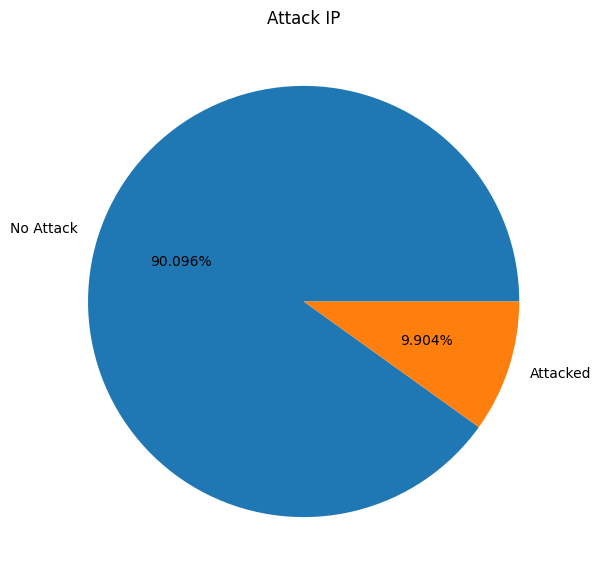

In [22]:

"""percentage wise calculations
""" 
percentage1=data['IsIPAttack'].value_counts(normalize=True)*100
classlabels=["No Attack","Attacked"]
plt.figure(figsize=(12,7))
plt.pie(percentage1,labels=classlabels,autopct='%1.3f%%')
plt.title("Attack IP")
plt.show()

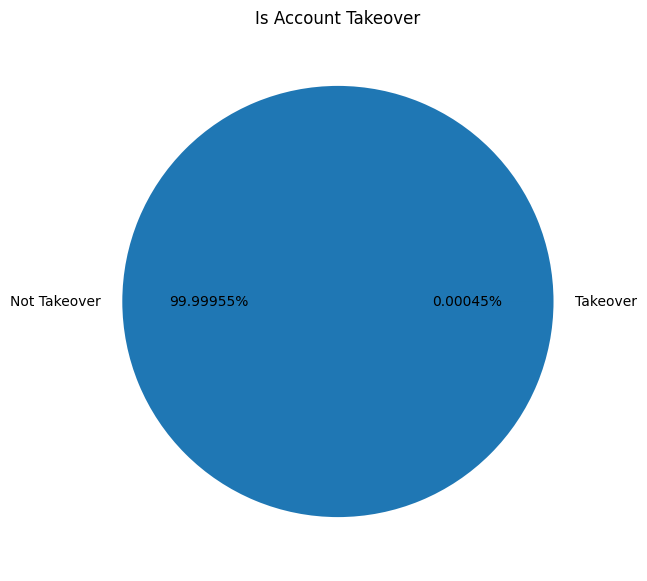

In [23]:
percentage2=data['IsAccountTakeover'].value_counts(normalize=True)*100
classlabels=["Not Takeover", "Takeover"]
plt.figure(figsize=(12,7))
plt.pie(percentage2,labels=classlabels,autopct='%1.5f%%')
plt.title("Is Account Takeover")
plt.show()

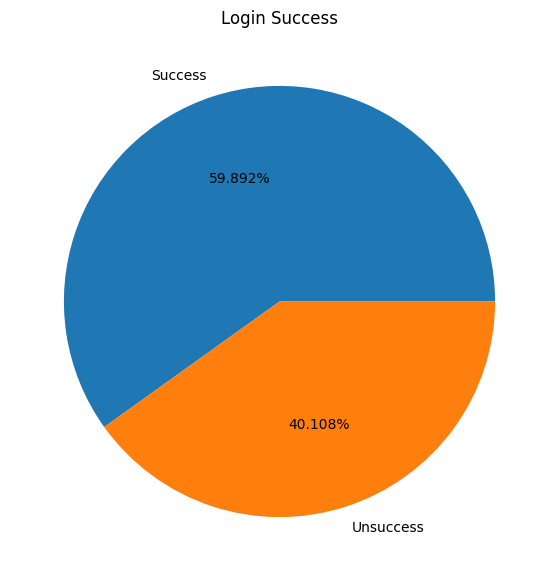

In [24]:
percentage3=data['IsLoginSuccessful'].value_counts(normalize=True)*100
classlabels=["Success","Unsuccess"]
plt.figure(figsize=(12,7))
plt.pie(percentage3,labels=classlabels,autopct='%1.3f%%')
plt.title("Login Success")
plt.show()

In [ ]:
# filtering data 
data = data[data.Country !='SR'] 
data = data[data.Country !='GM']
data = data[data.Country !='AQ']

In [25]:
# Splitting the dataset
features = data.drop(['IsIPAttack', 'IsAccountTakeover'], axis=1)
labels = data['IsAccountTakeover']

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42,stratify=labels)

In [26]:
# from sklearn.ensemble import AdaBoostClassifier, ExtraTreesClassifier
# from xgboost import XGBClassifier
# from lightgbm import LGBMClassifier

In [27]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Classifiers
classifiers = {
    'logistic_regression': LogisticRegression(max_iter=1000),
    'decision_tree': DecisionTreeClassifier(),
    'svm': SVC(probability=True),
    'random_forest': RandomForestClassifier(),
    'Adaboost' : AdaBoostClassifier(),
    'Extra' :  ExtraTreesClassifier(),
    'lgbm' : LGBMClassifier(),
    'XGB': XGBClassifier()
}

# A function to choose classifiers
def make_pipeline(classifier_key):
    if classifier_key in classifiers:
        clf = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('classifier', classifiers[classifier_key])
        ])
        return clf
    else:
        raise ValueError(f"Classifier {classifier_key} is not defined")

In [28]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [29]:
classifier_key = 'logistic_regression'
pipeline =  make_pipeline(classifier_key)
pipeline.fit(X_train, y_train)

# Evaluation
lrpredictions = pipeline.predict(X_test)
probs = pipeline.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, probs)

print(f"AUC Score: {auc_score}")

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

Score = accuracy_score(y_test,lrpredictions)
Classification_Report = classification_report(y_test,lrpredictions)

print("Logistic Regression")
print ("Accuracy Score value: {:.4f}".format(Score))
print (Classification_Report)

Logistic_Regression_Confusion_Matrix = ConfusionMatrixDisplay.from_estimator(pipeline, X_test, y_test)
Logistic_Regression_Confusion_Matrix
plt.show()

AUC Score: 0.9502065421676222


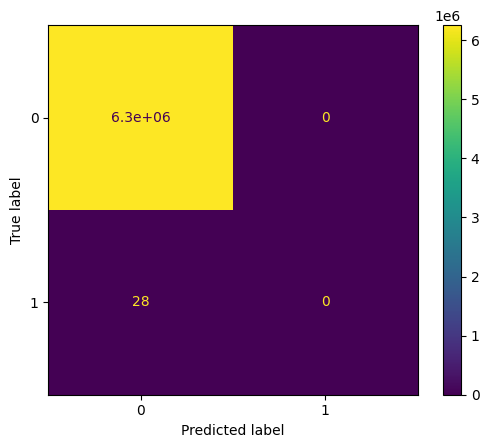

In [32]:
# Check for the input variable 
IsAccountTakeoverdata = data[data.IsAccountTakeover == 1]  
dfToTestList = IsAccountTakeoverdata.drop('IsAccountTakeover', axis=1) 
tocheck = dfToTestList.sample()
answer = pipeline.predict(tocheck)
print(answer)
tocheck  

In [33]:
classifier_key = 'decision_tree'
pipeline = make_pipeline(classifier_key)
pipeline.fit(X_train, y_train)

# Evaluation
dtpredictions = pipeline.predict(X_test)
probs = pipeline.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, probs)

print(f"AUC Score: {auc_score}")

Score = accuracy_score(y_test,dtpredictions)
Classification_Report = classification_report(y_test,dtpredictions)

print("Decision Tree")
print ("Accuracy Score value: {:.8f}".format(Score))
print (Classification_Report)

Logistic_Regression_Confusion_Matrix = ConfusionMatrixDisplay.from_estimator(pipeline, X_test, y_test)
Logistic_Regression_Confusion_Matrix
plt.show()

AUC Score: 0.6428542332092759


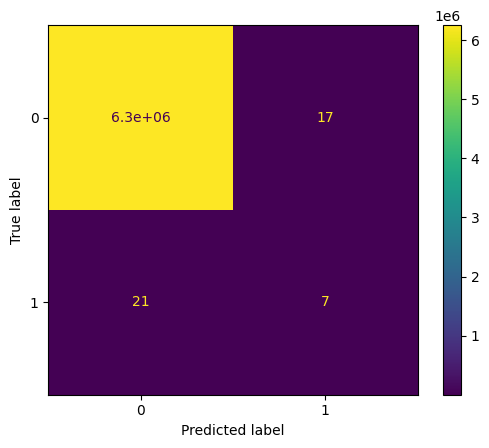

In [35]:
# Check for the input variable 
IsAccountTakeoverdata = data[data.IsAccountTakeover == 1]  
dfToTestList = IsAccountTakeoverdata.drop('IsAccountTakeover', axis=1) 
tocheck = dfToTestList.sample()
answer = pipeline.predict(tocheck)
print(answer)
tocheck  

In [36]:
classifier_key = 'random_forest'
pipeline = make_pipeline(classifier_key)
pipeline.fit(X_train, y_train)

# Evaluation
predictions = pipeline.predict(X_test)
probs = pipeline.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, probs)

print(f"AUC Score: {auc_score}")

Score = accuracy_score(y_test,predictions)
Classification_Report = classification_report(y_test,predictions)

print("Random Forest")
print ("Accuracy Score value: {:.8f}".format(Score))
print (Classification_Report)

Logistic_Regression_Confusion_Matrix = ConfusionMatrixDisplay.from_estimator(pipeline, X_test, y_test)
Logistic_Regression_Confusion_Matrix
plt.show()

AUC Score: 0.8748910780887812


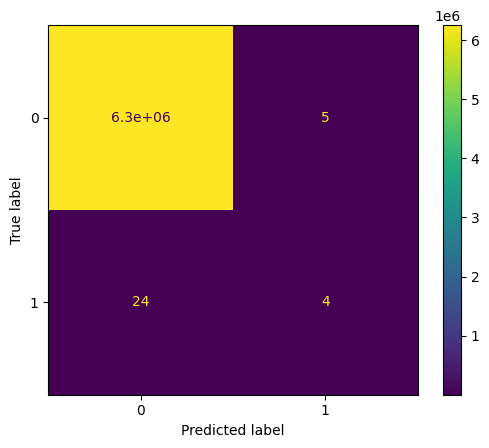

In [38]:
# Check for the input variable 
IsAccountTakeoverdata = data[data.IsAccountTakeover == 1]  
dfToTestList = IsAccountTakeoverdata.drop('IsAccountTakeover', axis=1) 
tocheck = dfToTestList.sample()
answer = pipeline.predict(tocheck)
print(answer)
tocheck   

In [40]:
from sklearn.metrics import ConfusionMatrixDisplay
classifier_key = 'Adaboost'
pipeline = make_pipeline(classifier_key)
pipeline.fit(X_train, y_train)

# Evaluation
abpredictions = pipeline.predict(X_test)
probs = pipeline.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, probs)

print(f"AUC Score: {auc_score}")

Score = accuracy_score(y_test,abpredictions)
Classification_Report = classification_report(y_test,abpredictions)

print("Ada Boost")
print ("Accuracy Score value: {:.8f}".format(Score))
print (Classification_Report)

Logistic_Regression_Confusion_Matrix = ConfusionMatrixDisplay.from_estimator(pipeline, X_test, y_test)
Logistic_Regression_Confusion_Matrix
plt.show()

AUC Score: 0.9506538398500118


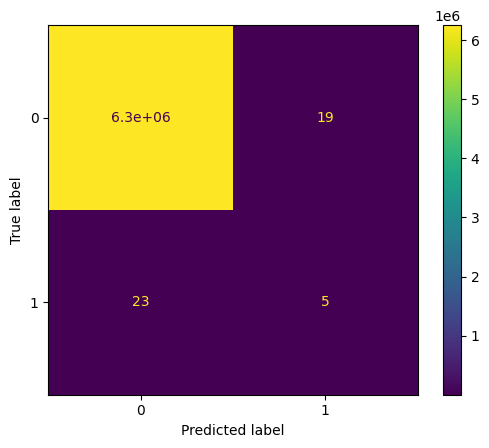

In [42]:
# Check for the input variable 
IsAccountTakeoverdata = data[data.IsAccountTakeover == 1]  
dfToTestList = IsAccountTakeoverdata.drop('IsAccountTakeover', axis=1) 
tocheck = dfToTestList.sample()
answer = pipeline.predict(tocheck)
print(answer)
tocheck  

In [43]:
classifier_key = 'lgbm'
pipeline = make_pipeline(classifier_key)
pipeline.fit(X_train, y_train)

# Evaluation
lgbmpredictions = pipeline.predict(X_test)
probs = pipeline.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, probs)

print(f"AUC Score: {auc_score}")

Score = accuracy_score(y_test,lgbmpredictions)
Classification_Report = classification_report(y_test,lgbmpredictions)

print("LGBM")
print ("Accuracy Score value: {:.8f}".format(Score))
print (Classification_Report)

Logistic_Regression_Confusion_Matrix = ConfusionMatrixDisplay.from_estimator(pipeline, X_test, y_test)
Logistic_Regression_Confusion_Matrix
plt.show()

[LightGBM] [Info] Number of positive: 113, number of negative: 25015298
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 2.134736 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1624
[LightGBM] [Info] Number of data points in the train set: 25015411, number of used features: 199
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000005 -> initscore=-12.307610
[LightGBM] [Info] Start training from score -12.307610
AUC Score: 0.4969858446630662


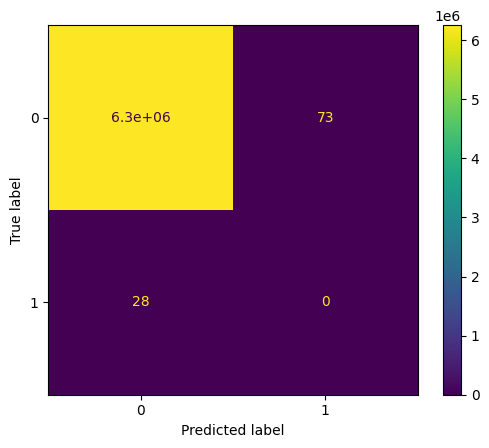

In [45]:
# Check for the input variable 
IsAccountTakeoverdata = data[data.IsAccountTakeover == 1]  
dfToTestList = IsAccountTakeoverdata.drop('IsAccountTakeover', axis=1) 
tocheck = dfToTestList.sample()
answer = pipeline.predict(tocheck)
print(answer)
tocheck  

In [46]:
classifier_key = 'XGB'
pipeline = make_pipeline(classifier_key)
pipeline.fit(X_train, y_train)

# Evaluation
xgbpredictions = pipeline.predict(X_test)
probs = pipeline.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, probs)

print(f"AUC Score: {auc_score}")

Score = accuracy_score(y_test,xgbpredictions)
Classification_Report = classification_report(y_test,xgbpredictions)

print("LGBM")
print ("Accuracy Score value: {:.8f}".format(Score))
print (Classification_Report)

Logistic_Regression_Confusion_Matrix = ConfusionMatrixDisplay.from_estimator(pipeline, X_test, y_test)
Logistic_Regression_Confusion_Matrix
plt.show()

AUC Score: 0.9847150401097385


In [47]:
# Check for the input variable 
IsAccountTakeoverdata = data[data.IsAccountTakeover == 1]  
dfToTestList = IsAccountTakeoverdata.drop('IsAccountTakeover', axis=1) 
tocheck = dfToTestList.sample()
answer = pipeline.predict(tocheck)
print(answer)
tocheck  

LGBM
Accuracy Score value: 0.99999536
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   6253825
           1       0.33      0.04      0.06        28

    accuracy                           1.00   6253853
   macro avg       0.67      0.52      0.53   6253853
weighted avg       1.00      1.00      1.00   6253853



In [ ]:
# Export model for api creation
import joblib
joblib.dump(pipeline, 'authuser_model.pkl')
joblib.dump(pipeline, 'authuser_model.joblib')


